In [1]:
import pandas as pd
import texthero as hero
from texthero import preprocessing

In [2]:
#import os
#import sys
#sys.path.append('./nlplot-1.2.0/nlplot')
#import nlplot

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_names = pd.read_table('./protein_names.txt', header = None)
df_uniq_names = pd.read_table('./uniq_protein_names.txt', header = None)

In [5]:
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_digits
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace
                   , preprocessing.remove_stopwords # stopword
                  ]

In [6]:
names = hero.clean(df_names[0], custom_pipeline)
uniq_names = hero.clean(df_uniq_names[0], custom_pipeline)

In [7]:
res = []
for c in names.unique():
    tokens = c.split()
    for i in range(len(tokens)):
        weight = i + 1
        res.append((" ".join(tokens[:i+1]).replace(":", ""), weight))

res = pd.DataFrame(res, columns=["name", "weight"])
#res.groupby(["name"])["weight"].sum().sort_values(ascending=False).head(50)

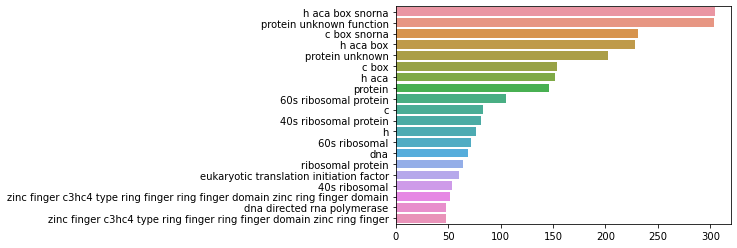

In [8]:
most_common_bi = dict(res.groupby(["name"])["weight"].sum().sort_values(ascending=False).head(20))
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.show()

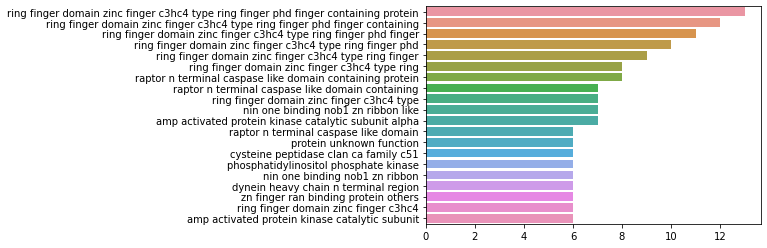

In [9]:
res = []
for c in uniq_names.unique():
    tokens = c.split()
    for i in range(len(tokens)):
        weight = i + 1
        res.append((" ".join(tokens[:i+1]).replace(":", ""), weight))

res = pd.DataFrame(res, columns=["name", "weight"])

most_common_bi = dict(res.groupby(["name"])["weight"].sum().sort_values(ascending=False).head(20))
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))
plt.show()